In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import os
%matplotlib inline

In [4]:
from BJH_function import BJH_calculation

In [5]:
N2 =

{'A': 9.53, 'Vmol': 34.67}

In [2]:
import unittest

ImportError: cannot import name 'get_gas_constant'

In [10]:
N2_model = {'A':9.53,'Vmol':34.67}
N2 = BJH_calculation.get_gas_constant()
print(N2['A'],N2_model['A'])

9.53 9.53


In [14]:
class TestBJH_Method(unittest.TestCase):
    
    def test_get_gas_constant(self):
        N2_model = {'A':9.53,'Vmol':34.67}
        N2 = BJH_calculation.get_gas_constant()
        print(N2['A'],N2_model['A'])
        self.assertTrue(True)
    
#TestBJH_Method()    
if __name__ == '__main__':
    unittest.main()

E
ERROR: C:\Users\hj5446\AppData\Roaming\jupyter\runtime\kernel-f4fa9980-666f-40b5-915a-f6a09f34e0f5 (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute 'C:\Users\hj5446\AppData\Roaming\jupyter\runtime\kernel-f4fa9980-666f-40b5-915a-f6a09f34e0f5'

----------------------------------------------------------------------
Ran 1 test in 0.002s

FAILED (errors=1)


SystemExit: True

To exit: use 'exit', 'quit', or Ctrl-D.


In [15]:
import unittest

class TestStringMethods(unittest.TestCase):

    def test_upper(self):
        self.assertEqual('foo'.upper(), 'FOO')

    def test_isupper(self):
        self.assertTrue('FOO'.isupper())
        self.assertFalse('Foo'.isupper())

    def test_split(self):
        s = 'hello world'
        self.assertEqual(s.split(), ['hello', 'world'])
        # check that s.split fails when the separator is not a string
        with self.assertRaises(TypeError):
            s.split(2)

if __name__ == '__main__':
    unittest.main()

E
ERROR: C:\Users\hj5446\AppData\Roaming\jupyter\runtime\kernel-f4fa9980-666f-40b5-915a-f6a09f34e0f5 (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute 'C:\Users\hj5446\AppData\Roaming\jupyter\runtime\kernel-f4fa9980-666f-40b5-915a-f6a09f34e0f5'

----------------------------------------------------------------------
Ran 1 test in 0.001s

FAILED (errors=1)


SystemExit: True

To exit: use 'exit', 'quit', or Ctrl-D.


In [3]:
# data reading 
p = np.array([0.1,0.6,0.9])
Q = np.array([1,10,12])
iso_df = pd.read_excel('test_iso.xlsx',sheetname='3_14')
software_result = pd.read_excel('test_psd.xlsx',sheetname='3_14')
p_measure = np.array(iso_df['p_rels'])
Q_measure = np.array(iso_df['q_abs'])
print(p_measure,Q_measure)
p = p_measure
Q = Q_measure
Davg,LP,Dp,dV_desorp,k = BJH_calculation.BJH(p,Q,'N2')
Vp,Vp_ccum,Vp_dlogD = BJH_calculation.result_psd(Davg,LP,Dp,k)

[ 0.30445319  0.35455676  0.39906515  0.44914481  0.49916705  0.54897325
  0.59911312  0.70041378  0.79602164  0.88106023  0.93408762  0.96615712
  0.97399365  0.97956734  0.98856465  0.99454603] [  3.59500861   3.83271776   4.05340358   4.3075434    4.57261985
   4.85873669   5.18098707   5.99158748   7.2030932    9.26471226
  12.06903614  15.5078227   16.76395245  17.82505854  20.08334045
  22.13072114]

istep/nstep 1 16

istep/nstep 2 16

istep/nstep 3 16

istep/nstep 4 16

istep/nstep 5 16

istep/nstep 6 16

istep/nstep 7 16

istep/nstep 8 16

istep/nstep 9 16

istep/nstep 10 16

istep/nstep 11 16

istep/nstep 12 16

istep/nstep 13 16

istep/nstep 14 16

istep/nstep 15 16

istep/nstep 16 16


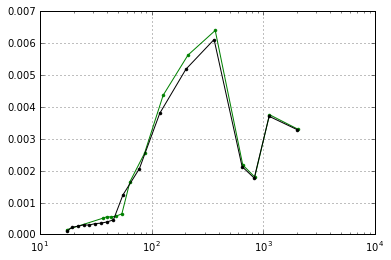

In [4]:
figure = plt.figure()
plt.semilogx(Davg[1:],Vp[1:],'g.-')
#plt.semilogx(Davg[1:],dV_desorp[1:],'r.-')
plt.semilogx(software_result['D'],software_result['IPV'],'k.-')
plt.grid()

In [5]:
Vp_output=np.array([0.,0.00330746,0.00375936,0.00180339,0.00218147,0.00640208,0.00562806,0.00436971,0.00254612,
     0.00165767,0.0006482,0.00058069,0.00055073,0.00055514,0.0005072,0.00014844,0.])
P_input = [0.30445319,  0.35455676,  0.39906515,  0.44914481,  0.49916705,  0.54897325,
  0.59911312,  0.70041378,  0.79602164,  0.88106023,  0.93408762,  0.96615712,
  0.97399365,  0.97956734,  0.98856465,  0.99454603]
#Vp1 = np.around(Vp1,8)
#Vp = np.around(Vp,8)
print(max(Vp_output-Vp))

3.69158586338e-06


In [3]:
import numpy as np

def result_psd(Davg,LP,Dp,k):
    Vp = np.pi*LP*(Davg/2.0)**2 *10**(-16) # return Vp vector[cm^3/g]
    Vp_ccum = np.add.accumulate(Vp)
    Vp_dlogD = np.zeros(len(Vp))
    for i in range(1,k+1):
        Vp_dlogD[i] = Vp[i]/ np.log10(Dp[i]/Dp[i+1])
    return Vp,Vp_ccum,Vp_dlogD